# WCS plotting: aplpy vs WCSAxes()

### ESOpy 3.0 @ Vitacura - 15-17 April 2019 - fvogt@eso.org


**Before we start:**
-       http://docs.astropy.org/en/stable/visualization/wcsaxes/
-       https://aplpy.github.io/


**premise:** 
- Two main ways to make a plot with WCS info: **aplpy** and **WCSAxes()** => Pros and Cons ?

**aplpy:** 
- a wrapper module around matplotlib to deal with WCS data for you
- lots of nifty little bells and whistles, but still a wrapper -> all matplotlib ground layer accessible if needed
- ideal to make good looking plots easily

**WCSAxes:** 
- exploit the native "transform" feature from matplotlib
- all the matplotlib we know and love ... => Better for those that need a lot of fine-tuning ... or none at all!



## 1) Set the stage: import the required modules

In [37]:
import os
from astropy.wcs import WCS
from astropy.io import fits


from astropy.coordinates import SkyCoord

## 2) WCSAxes()

In [38]:
# A simple DSS2-R band image, obtained from http://archive.eso.org/dss/dss
fits_fn = os.path.join('.','random_DSS2-Red.fits') 

# Get the WCS info
hdu = fits.open(fits_fn)[0]
wcs = WCS(hdu.header)


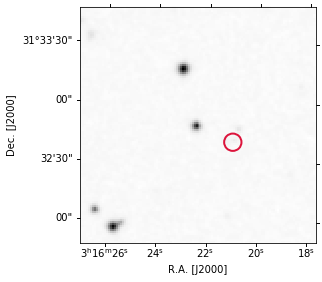

In [41]:
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec # GRIDSPEC !
gs = gridspec.GridSpec(1, 1, height_ratios=[1], width_ratios=[1], 
                       left=0.05, right=0.95, bottom=0.08, top=0.9, wspace=0.02, hspace=0.03)


fig = plt.figure()
ax = fig.add_subplot(gs[0,0], projection=wcs)

ax.imshow(hdu.data, cmap='Greys', origin='lower')

# Reset to see all the pixels, including the ones at the edges!
ax.set_xlim(-0.5, hdu.data.shape[1] - 0.5)
ax.set_ylim(-0.5, hdu.data.shape[0] - 0.5)

m = SkyCoord('03h16m21s', '31d32m40s', frame='icrs')

ax.scatter(m.ra.deg, m.dec.deg, s=300, lw=2, edgecolor='crimson', facecolor='none',
           transform=ax.get_transform('world'), 
           )

# Need to add axis labels as well ...
ax.set_xlabel('R.A. [J2000]')
ax.set_ylabel('Dec. [J2000]')


## 3) Aplpy

In [44]:
import aplpy
import matplotlib.pyplot as plt

# A simple DSS2-R band image, obtained from http://archive.eso.org/dss/dss
fits_fn = os.path.join('.','random_DSS2-Red.fits') 


fig = plt.figure()
# For the first subplot, specify its location "manually" (no gridspec)
ax1 = aplpy.FITSFigure(fits_fn, figure=fig, north=False)
ax1.show_grayscale(invert = True, stretch='arcsinh') # Show the image in a grayscale arcsinh stretch

m = SkyCoord('03h16m21s', '31d32m40s', frame='icrs')

# Adding markers for position of interest
ax1.show_markers([m.ra.deg],[m.dec.deg], marker='o',facecolor='None', s=3e2, edgecolor='crimson',zorder=10, lw=2)

# Some fun aplpy features
#ax1.add_scalebar(180./3600,label='180" = 27 kpc', corner = 'bottom left', color = 'k', frame=1, linewidth=2)

# Zoom-in on a region of interest
#ax1.recenter(m.ra.deg,m.dec.deg, radius=120/3600)

 [astropy.io.fits.verify]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


INFO: Auto-setting vmin to  3.473e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.263e+04 [aplpy.core]


## 4) Practical session 3


Go check X3_wcsaxes.py and try to fill the gaps.
